
# **Import Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

# **Read the csv files**

In [ ]:
army = pd.read_csv('/content/army.csv')
cities = pd.read_csv('/content/cities.csv')
temperature = pd.read_csv('/content/temperature.csv')
labels = pd.read_csv('/content/labels.csv')


In [ ]:
print("Army Data:\n", army.head())
print("\nCities Data:\n", cities.head())
print("\nTemperature Data:\n", temperature.head())

Army Data:
     lon   lat    size direction  division
0  24.0  54.9  340000         A         1
1  24.5  55.0  340000         A         1
2  25.5  54.5  340000         A         1
3  26.0  54.7  320000         A         1
4  27.0  54.8  300000         A         1

Cities Data:
     lon   lat       city
0  24.0  55.0      Kowno
1  25.3  54.7      Wilna
2  26.4  54.4   Smorgoni
3  26.8  54.3  Molodexno
4  27.7  55.2  Gloubokoe

Temperature Data:
     lon  temp         date
0  37.6     0  18 Oct 1812
1  36.0     0  24 Oct 1812
2  33.2    -9  09 Nov 1812
3  32.0   -21  14 Nov 1812
4  29.2   -11  24 Nov 1812


# **Reacreating the visualiazation**

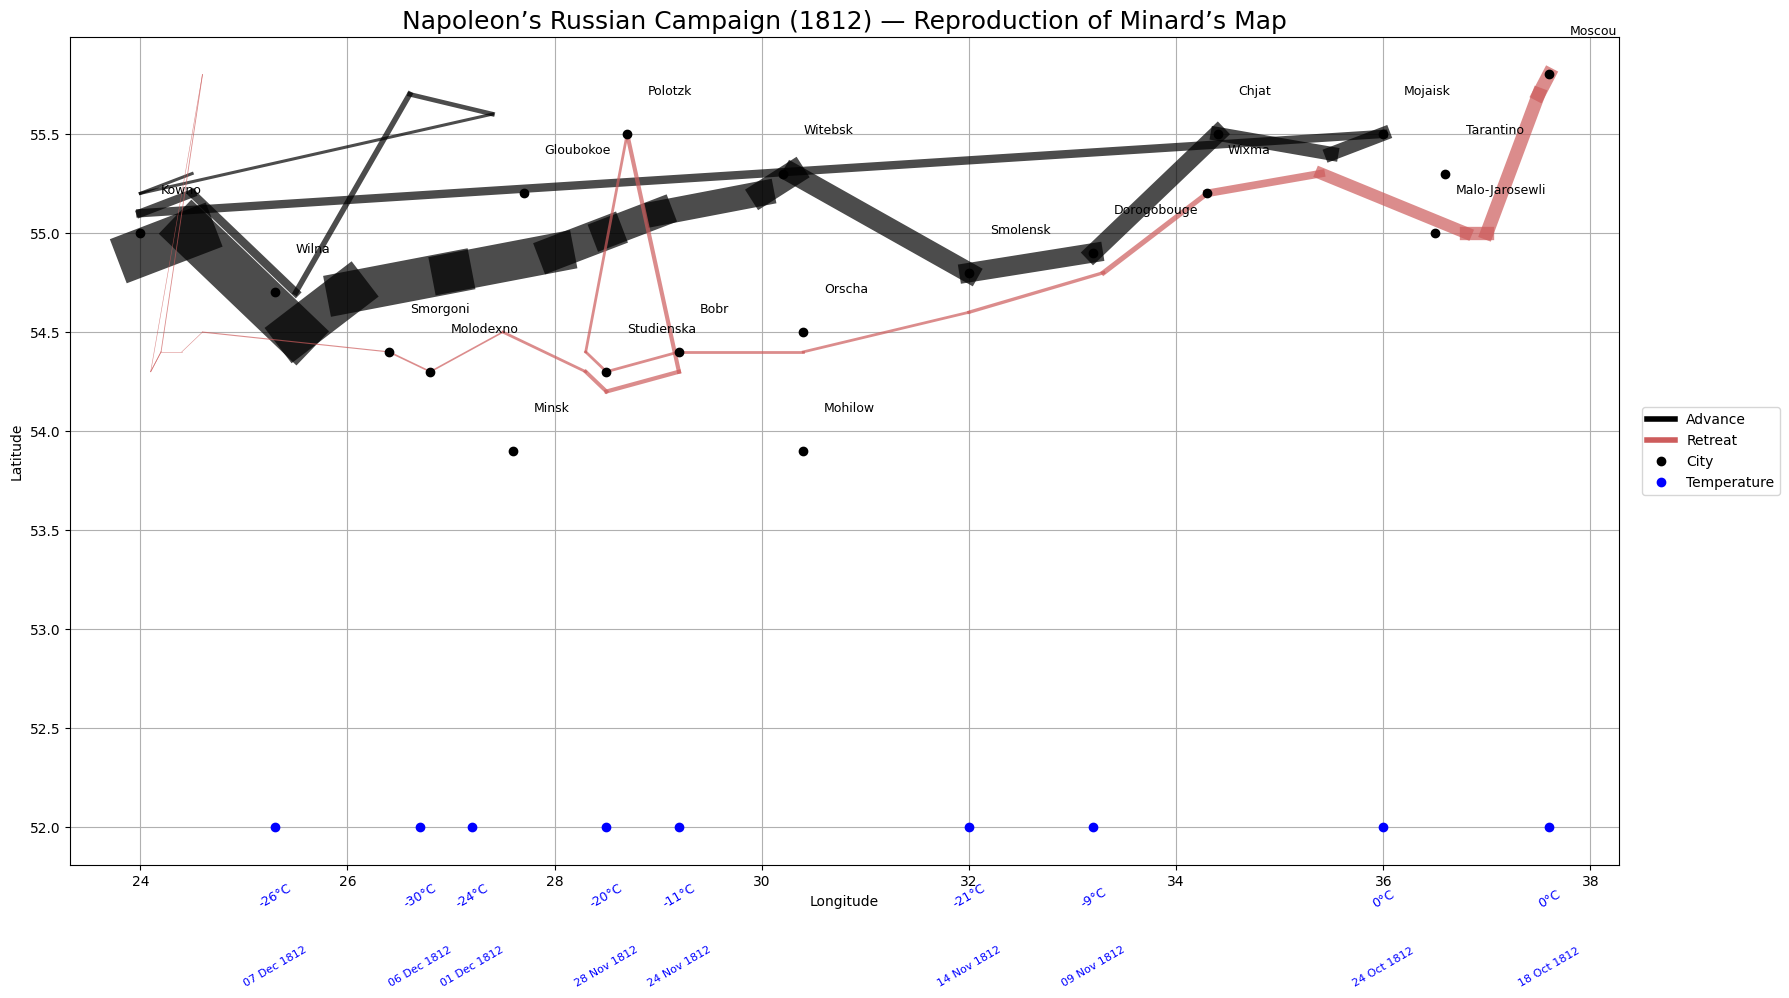

In [ ]:
plt.figure(figsize=(20,10))

for direction, color in zip(["A", "R"], ["#000000", "#CD5C5C"]):
    subset = army[army['direction'] == direction].reset_index(drop=True)
    for i in range(len(subset) - 1):
        x = [subset.loc[i, 'lon'], subset.loc[i + 1, 'lon']]
        y = [subset.loc[i, 'lat'], subset.loc[i + 1, 'lat']]
        size = min(subset.loc[i, 'size'], subset.loc[i + 1, 'size'])
        plt.plot(x, y, linewidth=size / 10000, color=color, alpha=0.7)

for _, row in cities.iterrows():
    plt.plot(row['lon'], row['lat'], 'ko')
    plt.text(row['lon'] + 0.2, row['lat'] + 0.2, row['city'],
             fontsize=9, ha='left', color='black')


for i, row in temperature.iterrows():
    plt.plot(row['lon'], 52, 'bo')
    plt.text(row['lon'], 51.6, f"{row['temp']}°C",
             fontsize=9, color='blue', ha='center', rotation=30)
    plt.text(row['lon'], 51.2, row['date'],
             fontsize=8, color='blue', ha='center', rotation=30)


plt.title("Napoleon’s Russian Campaign (1812) — Reproduction of Minard’s Map", fontsize=18)
plt.xlabel("Longitude")
plt.ylabel("Latitude")


legend_elements = [
    Line2D([0], [0], color='#000000', lw=4, label='Advance'),
    Line2D([0], [0], color='#CD5C5C', lw=4, label='Retreat'),
    Line2D([0], [0], color='black', marker='o', linestyle='', label='City'),
    Line2D([0], [0], color='blue', marker='o', linestyle='', label='Temperature'),
]
plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1.01, 0.5))

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.grid(True)
plt.show()